---

---

## Implementação de um neurônio (PERCEPTRON) para aprendizado das relações lógicas AND e OR, e "tentativa de aprendizado da relação XOR

---

---

### Bibliotecas

In [1]:
import random
import time
import matplotlib.pyplot as plt
import numpy as np

### Função que imprime menu de opções (AND, OR ou XOR)

In [2]:
def menu():
    Valid_Option = False
    while Valid_Option == False:
        print("\n\n***** TREINAMENTO DE UM NEURÔNIO *******")
        print("\nESCOLHA A RELAÇÃO LÓGICA DESEJADA: ")
        print("\n(1)OR");
        print("\n(2)AND");
        print("\n(3)XOR"); 
        Option = input("\nOpção escolhida =>\n");
        try:
            Option = int(Option)
            if (Option < 1) or (Option > 3):
                print('\nOPÇÃO INVÁLIDA!!')
            else:
                Valid_Option = True
        except:
            print("\nA opção dever numérica. Digite 1, 2 ou 3.")
    return(Option)

### Função que inicialização aleatoriamente os pesos sináptico do neurônio com valores entre 0 e 1

In [3]:
def inicializa_pesos(w):  
    for i in range(0,3):
        w.append(random.random())

Função que implementa a função de ativação do neurônio. No caso a função *heaviside*.

In [4]:
def funcao_ativacao(s):
    if (s >= 0):
        return(1)
    else:
        return(0)   

### Função que implementa o treinamento (processo de aprendizagem) do neurônio

In [5]:
def treina_neuronio(x1,x2,w,Learning_Rate,Out):
    print("\n\nINICIANDO TREINAMENTO DO NEURÔNIO...")
    print("\nPesos iniciais (aleatórios): w0 = ",round(w[0],4)," w1 = ",round(w[1],4),"w2 = ", round(w[2],4))
    print("\nRazão de aprendizagem = ",Learning_Rate)
    Epoch = 0
    Global_Error = 1
    while Global_Error != 0:
        Global_Error = 0;
        for i in range(0,4):
            sum = w[0] + x1[i]*w[1] + x2[i]*w[2]
            y = funcao_ativacao(sum) 
            Error = Out[i] - y
            w[0] = w[0] + Learning_Rate*Error*1
            w[1] = w[1] + Learning_Rate*Error*x1[i]
            w[2] = w[2] + Learning_Rate*Error*x2[i]
            Global_Error +=abs(Error) #soma acumulada dos MÓDULOS dos erros (para evitar de um erro (-1) anular o outro (+1)        
        Epoch+=1
        print("\nSeção de treinamento "+str(Epoch)+": w0 = ", round(w[0],4)," w1 = ",round(w[1],4)," w2 = ",round(w[2],4)," ERRO = ",Global_Error)
        if Epoch > 100:  #mínimo local
            print("\n\nTreinamento interrompido!!")
            print("\nNão foi possível treinar o neurônio para a relação desejada.")
            Opcao = input("\nDeseja reiniciar o treinamento com outros pesos sinápticos? (S|N)\n")
            if Opcao.upper() != 'N':
                w = []
                inicializa_pesos(w)
                Epoch = 0
                Global_Error = 1
            else:
                break                
    print("\nFIM DO TREINAMENTO!\n")
    print("Valores finais dos pesos sinápticos:")
    print("\nw0 = ",round(w[0],4))
    print("w1 = ",round(w[1],4))
    print("w2 = ",round(w[2],4))

### Função que testa o neurônio depois de treinado

In [6]:
def testa_neuronio(w):
    print("\nTESTE DO NEURÔNIO TREINADO...")
    Opcao = 'S'
    while Opcao.upper() != 'N':
        print("\nDigite as entradas que deseja testar\n")
        x1 = float(input("x1 = "))
        x2 = float(input("\nx2 = "))
        sum = w[0] + x1*w[1] + x2*w[2]
        print("\n\nSaída do neurônio = ",funcao_ativacao(sum))
        Opcao = input("\nDeseja testar outras entradas? (S|N)\n")
    print("\nFIM DOS TESTES!")

### Função que plota o gráfico com os padrões de entrada e fronteira (linha) de decisão separando as classes

In [7]:
def plota_grafico(x1,x2,w,Correct_output,Label):
    x = np.arange(-0.5, 1.5, 0.1)
    y = -(w[1]/w[2])*x - w[0]/w[2] # separador linear
    plt.plot(x, y,'k:')
    plt.axis([-0.5, 1.5, -0.5, 1.5])
    plt.xlabel('Entrada x1')
    plt.ylabel('Entrada x2')
    plt.grid(True)
    plt.title('INTERPRETAÇÃO GEOMÉTRICA\n\nRelação '+ Label.upper())
    if w[0]/w[2]/-(w[1]/w[2]) > 1:
        plt.text((0.75 + w[0]/w[2])/-(w[1]/w[2]),0.75,' w1.x1 + w2.x2 = '+r'$\theta$',fontstyle='italic')
    else:
        plt.text((0.25 + w[0]/w[2])/-(w[1]/w[2]),0.25,' w1.x1 + w2.x2 = '+r'$\theta$',fontstyle='italic')
    plt.text(-0.24,1.4,'w1 = ' + str(round(w[1],4)),fontsize=8,fontstyle='italic')
    plt.text(0.35,1.4,'w2 = ' + str(round(w[2],4)),fontsize=8,fontstyle='italic')
    plt.text(0.96,1.4,r'$\theta$' + ' = ' + str(round(w[0],4)),fontsize=8,fontstyle='italic')
    if  Label == 'OR':
        plt.plot(x1[1:4], x2[1:4], 'bo')
        plt.plot(x1[0], x2[0], 'ro')
    elif Label == 'AND':
            plt.plot(x1[0:3], x2[0:3], 'ro')
            plt.plot(x1[3], x2[3], 'bo')
    else:
         plt.plot(x1[0], x2[0], 'ro')
         plt.plot(x1[3], x2[3], 'ro')
         plt.plot(x1[1:3], x2[1:3], 'bo')
         plt.text(-0.1,1.2,'Não é possível separar as duas classes de padrões!',color = 'red',fontsize=8,fontstyle='italic')
         plt.text(0.25,1.1,'Problema Não Linear!',color = 'red',fontsize=8,fontstyle='italic')
    plt.show() 

### Parte principal do programa



***** TREINAMENTO DE UM NEURÔNIO *******

ESCOLHA A RELAÇÃO LÓGICA DESEJADA: 

(1)OR

(2)AND

(3)XOR

Opção escolhida =>
3

XOR é um problema de classificação Não Linear!!!!

Este neurônio é linear! Não será capaz de aprender! Veja...


INICIANDO TREINAMENTO DO NEURÔNIO...

Pesos iniciais (aleatórios): w0 =  0.7126  w1 =  0.5988 w2 =  0.1906

Razão de aprendizagem =  0.2

Seção de treinamento 1: w0 =  0.3126  w1 =  0.3988  w2 =  -0.0094  ERRO =  2

Seção de treinamento 2: w0 =  -0.0874  w1 =  0.1988  w2 =  -0.2094  ERRO =  2

Seção de treinamento 3: w0 =  -0.0874  w1 =  -0.0012  w2 =  -0.2094  ERRO =  2

Seção de treinamento 4: w0 =  -0.0874  w1 =  -0.2012  w2 =  -0.2094  ERRO =  2

Seção de treinamento 5: w0 =  0.1126  w1 =  -0.2012  w2 =  -0.2094  ERRO =  3

Seção de treinamento 6: w0 =  0.1126  w1 =  -0.2012  w2 =  -0.2094  ERRO =  4

Seção de treinamento 7: w0 =  0.1126  w1 =  -0.2012  w2 =  -0.2094  ERRO =  4

Seção de treinamento 8: w0 =  0.1126  w1 =  -0.2012  w2 =  -0.2094  E

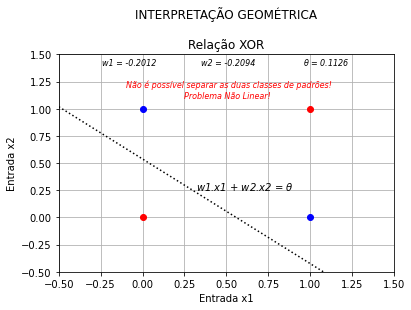


Deseja testar o neurônio treinado? (S|N)
n

Deseja realizar outro treinamento? (S|N)
n

FIM DO PROGRAMA!


In [8]:
# entradas
x1 = [0, 0, 1, 1]
x2 = [0, 1, 0, 1]
# razão (passo) de aprendizagem
Learning_Rate = 0.2 
Repetir = 'S'
while Repetir.upper() != 'N':
    #inicializa pesos sinápticos
    w = []
    inicializa_pesos(w)
    Option = menu()
    if Option == 1: # Relação OR
        Correct_output = [0, 1, 1, 1]
        Label = 'OR'
    elif Option == 2: # Relação AND
        Correct_output = [0, 0, 0, 1]
        Label = 'AND'
    else:  # Relação XOR (não linear!!!)
        Correct_output = [0, 1, 1, 0]
        Label = 'XOR'
        print("\nXOR é um problema de classificação Não Linear!!!!")
        print("\nEste neurônio é linear! Não será capaz de aprender! Veja...")
        time.sleep(5)
    treina_neuronio(x1,x2,w,Learning_Rate,Correct_output)
    Opcao = input("\nDeseja visualizar o gráfico de classificação? (S|N)\n")
    if Opcao.upper() != 'N':
        plota_grafico(x1,x2,w,Correct_output,Label)
    Opcao = input("\nDeseja testar o neurônio treinado? (S|N)\n")
    if Opcao.upper() != 'N':
        testa_neuronio(w)
    Repetir = input("\nDeseja realizar outro treinamento? (S|N)\n")
print("\nFIM DO PROGRAMA!")   
   
   